In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
restaurants_df = pd.read_csv('output/responses/batch123_restaurants_dataset.csv')

In [3]:
restaurants_df.shape

(6139, 17)

In [4]:
restaurants = restaurants_df.copy()

In [5]:
reviews_df = pd.read_csv('output/responses/batch123_reviews_dataset.csv')

/var/folders/cw/6l8njb_s1ml7w7g9qkx38dlh0000gn/T/ipykernel_87608/772375278.py:1: DtypeWarning: Columns (8,9,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv('output/responses/batch123_reviews_dataset.csv')


In [6]:
reviews_df.shape

(2602486, 16)

In [7]:
reviews = reviews_df.copy()

# Data Cleaning

## Drop unnnecessary columns

In [8]:
restaurants = restaurants.drop(columns=['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

In [9]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       6139 non-null   object 
 1   name           6139 non-null   object 
 2   reviews        6139 non-null   int64  
 3   main_category  6064 non-null   object 
 4   categories     6064 non-null   object 
 5   main_rating    6139 non-null   float64
 6   address        6054 non-null   object 
 7   link           6139 non-null   object 
 8   review_photos  6139 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 431.8+ KB


In [10]:
restaurants.shape

(6139, 9)

## Fill NaN values

In [11]:
restaurants.isnull().sum()

place_id          0
name              0
reviews           0
main_category    75
categories       75
main_rating       0
address          85
link              0
review_photos     0
dtype: int64

In [12]:
restaurants.fillna({'address': 'Singapore'}, inplace=True)

In [13]:
restaurants.fillna({'main_category': 'Unknown'}, inplace=True)

In [14]:
restaurants.fillna({'categories': "['Unknown']"}, inplace=True)

In [15]:
restaurants.isnull().sum()

place_id         0
name             0
reviews          0
main_category    0
categories       0
main_rating      0
address          0
link             0
review_photos    0
dtype: int64

## Drop any duplicates

In [19]:
restaurants[restaurants.duplicated(keep=False)]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos


In [16]:
restaurants.drop_duplicates(inplace=True)

In [17]:
restaurants.shape

(5082, 9)

In [20]:
restaurants[restaurants.duplicated(subset=['place_id', 'name', 'reviews', 'address'])]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
52,ChIJl_5IjwkX2jERSNvWC6pMvA0,I Love Taimei The Woodleigh Mall | Fried Chick...,28,Fried chicken takeaway,"['Fried chicken takeaway', 'Bubble tea store',...",4.3,"11 Bidadari Park Dr, B1-K32, Singapore 367803",https://www.google.com/maps/place/I+Love+Taime...,['https://lh5.googleusercontent.com/p/AF1QipNI...
53,ChIJx64m9boZ2jERQxfwfy3Nl70,I Love Taimei 我愛台妹 Bugis Junction | Fried Chic...,205,Fried chicken takeaway,"['Fried chicken takeaway', 'Bubble tea store',...",4.0,"230 Victoria St, #B1-K11 to 11A, Singapore 188024",https://www.google.com/maps/place/I+Love+Taime...,['https://lh5.googleusercontent.com/p/AF1QipNX...
82,ChIJV33tA-gZ2jERe0i-6w2umxk,Imperial Grand Cantonese Cuisine,249,Asian restaurant,"['Asian restaurant', 'Cantonese restaurant']",4.5,"11 Sam Leong Rd, #03-01 TRIO BUILDING, Singapo...",https://www.google.com/maps/place/Imperial+Gra...,['https://lh5.googleusercontent.com/p/AF1QipP9...
99,ChIJn5GxhcIZ2jERHofsKnfrPEc,Imperial Treasure Fine Chinese Cuisine (Marina...,552,Chinese restaurant,['Chinese restaurant'],4.0,"8 Bayfront Avenue Marina Bay Sands, Level 2, L...",https://www.google.com/maps/place/Imperial+Tre...,['https://lh5.googleusercontent.com/p/AF1QipOy...
101,ChIJn3KRuzgZ2jERq14svIz5O9g,Imperial Treasure Fine Teochew Cuisine,404,Chinese restaurant,['Chinese restaurant'],4.1,"Orchard Turn, #03-05 ION Orchard, 2, Singapore...",https://www.google.com/maps/place/Imperial+Tre...,['https://lh5.googleusercontent.com/p/AF1QipPx...
...,...,...,...,...,...,...,...,...,...
6115,ChIJG0v_dVAZ2jERyoS6xFfB1_w,Beirut Express (Shenton),144,Fast food restaurant,"['Fast food restaurant', 'Greek restaurant', '...",3.9,"1 Shenton Wy, #01-06, Singapore 068803",https://www.google.com/maps/place/Beirut+Expre...,['https://lh5.googleusercontent.com/p/AF1QipOH...
6117,ChIJOe75OhQZ2jERg1rJsn5jEoA,House of Malaysia,38,Malaysian restaurant,['Malaysian restaurant'],3.6,"200 Jln Sultan, #01-25 Textile Centre, Singapo...",https://www.google.com/maps/place/House+of+Mal...,['https://lh5.googleusercontent.com/p/AF1QipPP...
6118,ChIJJR9auHAZ2jER8enAJuyfCyQ,House of Peranakan Petit,317,Nyonya restaurant,"['Nyonya restaurant', 'Asian restaurant', 'Res...",4.2,"42 Eng Hoon St, Estate 169785",https://www.google.com/maps/place/House+of+Per...,['https://lh5.googleusercontent.com/p/AF1QipNE...
6120,ChIJdwjQ2tQZ2jERFYU-5f1aW2g,Hoàng Hâu - Vietnamese Restaurant,239,Vietnamese restaurant,['Vietnamese restaurant'],4.6,"146 01, 1090 Jalan Bukit Merah, Block 146, 160146",https://www.google.com/maps/place/Ho%C3%A0ng+H...,['https://lh5.googleusercontent.com/p/AF1QipMC...


In [21]:
restaurants = restaurants.drop_duplicates(subset=['place_id', 'name', 'reviews', 'address'])

In [22]:
restaurants.shape

(4660, 9)

## Remove non-dining establishments

In [23]:
main_categories = list(restaurants['main_category'])
main_categories = list(set(main_categories))
main_categories.sort()

In [24]:
main_categories

['ATM',
 'Accountant',
 'Acupuncture clinic',
 'Advertising agency',
 'African restaurant',
 'Air conditioning store',
 'American restaurant',
 'Anglican church',
 'Antique store',
 'Apartment building',
 'Apartment complex',
 'Argentinian restaurant',
 'Art cafe',
 'Art center',
 'Art gallery',
 'Art museum',
 'Art studio',
 'Artist',
 'Artistic handicrafts',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Association / Organization',
 'Athletic field',
 'Auditor',
 'Authentic Japanese restaurant',
 'Ayam penyet restaurant',
 'Açaí shop',
 'Baby store',
 'Bakery',
 'Ballet school',
 'Bank',
 'Bar',
 'Bar & grill',
 'Barbecue restaurant',
 'Barber shop',
 'Beauty product supplier',
 'Beauty salon',
 'Bed & breakfast',
 'Bicycle club',
 'Bistro',
 'Boutique',
 'Branding agency',
 'Brazilian restaurant',
 'Breakfast restaurant',
 'Bridal shop',
 'Brunch restaurant',
 'Bubble tea store',
 'Buffet restaurant',
 'Burmese restaurant',
 'Bus Interchange',
 'Bus depot',
 'Bus stop',
 'Busin

In [25]:
len(main_categories)

428

In [26]:
cats_to_remove = ['Advertising agency',
 'Air conditioning store',
 'Art museum',
 'Art studio',
 'Association / Organization',
 'Açaí shop',
 'Bakery',
 'Beauty salon',
 'Bed & breakfast',
 'Bicycle club',
 'Boutique',
 'Branding agency',
 'Business center',
 'Business management consultant',
 'Candle store',
 'Car dealer',
 'Car wash',
 'Caterer',
 'Catering food and drink supplier',
 "Children's clothing store",
 'Chinese Takeaway',
 'Chinese language school',
 'Clothing store',
 'Coaching center',
 'Coffee store', 'Coffee shop',
 'Coffee wholesaler',
 'Computer support and services',
 'Condominium complex',
 'Confectionery store',
 'Consultant',
 'Corporate office',
 'Coworking space',
 'Curtain and upholstery cleaning service',
 'Dance school',
 'Delivery Restaurant',
 'Department store',
 'Design agency',
 'Designer Clothing Shop',
 'Diving center',
 'E-commerce service',
 'Education center',
 'Employment center',
 'Event management company',
 'Event venue', 'Fast food restaurant',
 'Fish store',
 'Florist',
 'Flower delivery',
 'Food court',
 'Food manufacturer',
 'Food producer',
 'Food products supplier',
 'Freight forwarding service',
 'Fruit wholesaler',
 'Gift shop',
 'Gourmet grocery store',
 'Grocery store',
 'Gym and Fitness Centre',
 'Hawker Stall',
 'Hawker center',
 'Health and beauty shop',
 'Health food store',
 'Hematologist',
 'Holding company',
 'Hotel',
 'Housing development',
 'Ice cream shop',
 'Importer',
 'Indoor golf course',
 'Industrial Real Estate Agency',
 'Industrial equipment supplier',
 'Information services',
 'Interior designer',
 'Italian grocery store',
 'Japanese confectionery shop',
 'Japanese grocery store',
 'Jeweler',
 'Jewelry store',
 'Laboratory equipment supplier',
 'Law firm',
 'Live music venue',
 'Lodging',
 'Lottery retailer',
 'MRT/LRT Station',
 'Market',
 'Marketing agency',
 'Marketing consultant',
 'Maternity store',
 'Media company',
 'Medical equipment supplier',
 'Memorial park',
 'Monument maker',
 'Motorcycle rental agency',
 'Movie rental store',
 'Moving and storage service',
 'Music producer',
 'Music school',
 'Nail salon',
 'Park',
 'Parking lot',
 'Pastry shop',
 'Performing arts group',
 'Pet Shop',
 'Photography service',
 'Plastic products supplier',
 'Police station',
 'Property management company',
 'Publisher',
 'Real estate agency',
 'Real estate agent',
 'Real estate consultant',
 'Recording studio',
 'Religious organization',
 'Restaurant supply store',
 'Serviced accommodation',
 'Shipping and mailing service',
 'Shop',
 'Shopping mall',
 'Souvenir store',
 'Supermarket',
 'Tattoo and piercing shop',
 'Tattoo shop',
 'Tea store',
 'Transportation service',
 'Tutoring service',
 'Unknown',
 'Used clothing store',
 'Video production service',
 'Waxing hair removal service',
 'Wedding venue',
 'Wellness center',
 'Wellness program',
 'Wine cellar',
 "Women's clothing store"]

In [27]:
cats_to_remove = [cat.lower() for cat in cats_to_remove]
mask = restaurants['main_category'].str.lower().isin(cats_to_remove)
restaurants = restaurants[~mask]
restaurants.shape

(3425, 9)

# Basic Analysis

## Distribution of restaurants by ratings

### 🧑🏻‍🍳🧑🏻‍🍳 The average restaurant rating is 4; outliers range from rating of 0 to 3

In [28]:
restaurants['main_rating'].mean()

3.9724379562043795

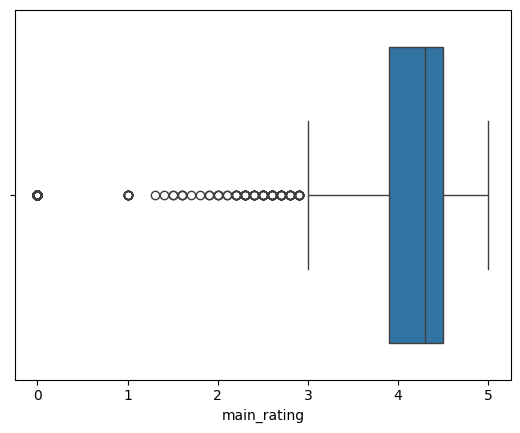

In [29]:
sns.boxplot(data=restaurants, x='main_rating');

### 🧑🏻‍🍳🧑🏻‍🍳 Majority of restaurants are rated 4.0 to 4.5

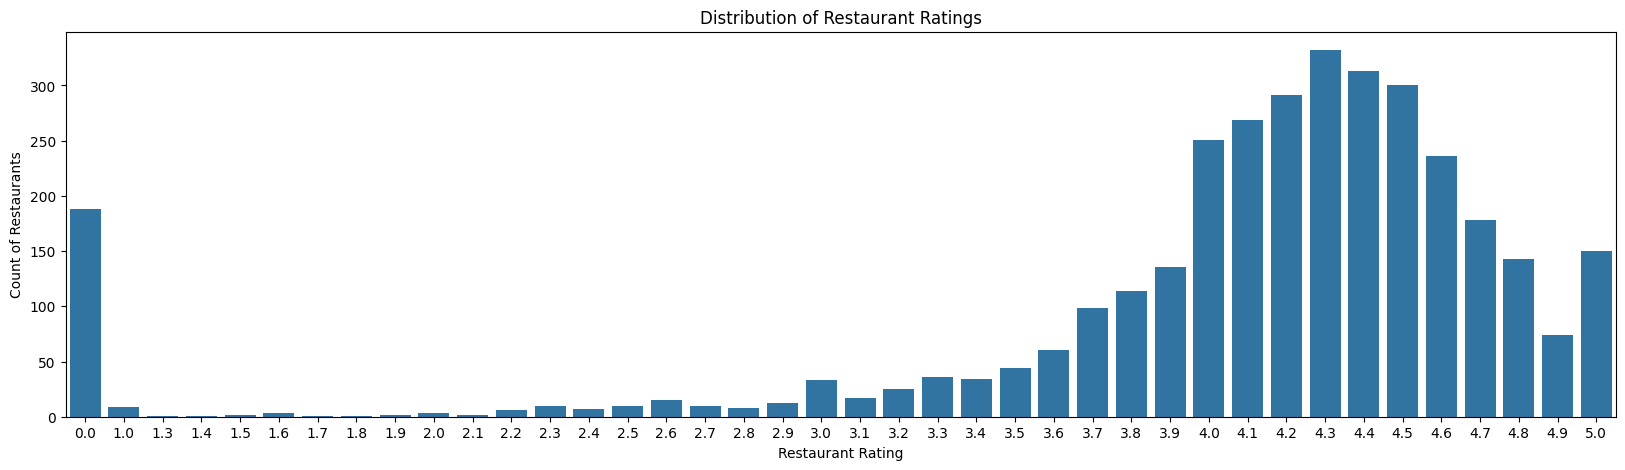

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(data=restaurants, x='main_rating')
plt.xlabel('Restaurant Rating')
plt.ylabel('Count of Restaurants')
plt.title('Distribution of Restaurant Ratings')
plt.show()

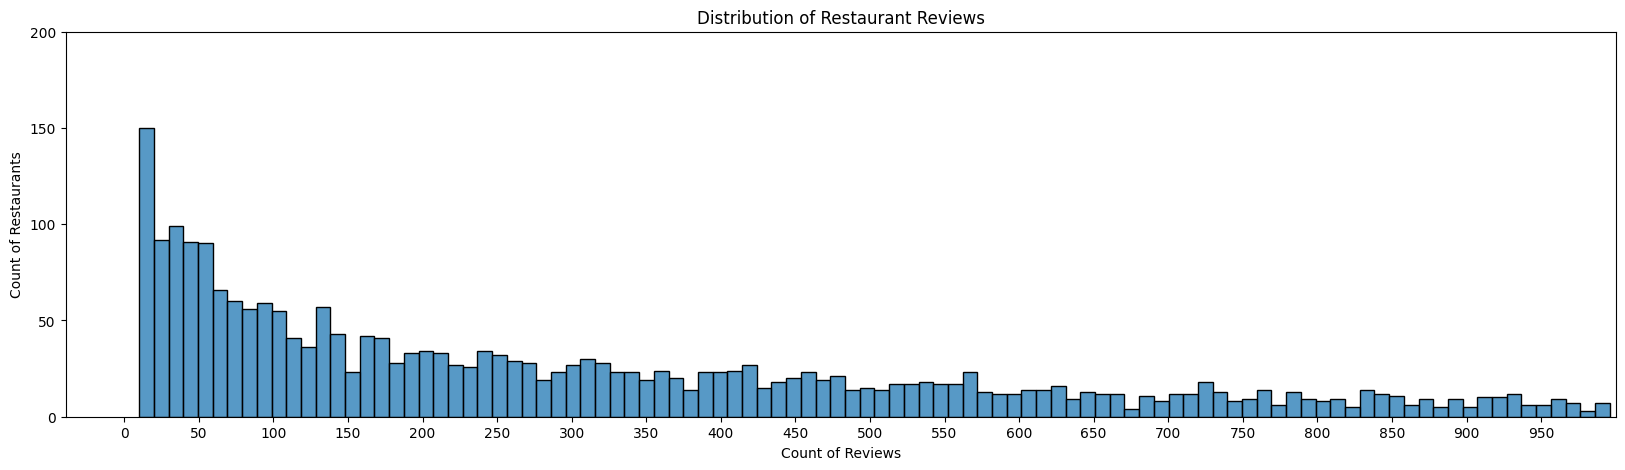

In [41]:
plt.figure(figsize=(20,5))
sns.histplot(data=restaurants[(restaurants['reviews']<=1000) & (restaurants['reviews']>=10)], x='reviews', bins=100)
plt.xticks(np.arange(0,1000,50))
plt.yticks(np.arange(0,600,50))
plt.xlim(right=1000)
plt.ylim(top=200)
plt.xlabel('Count of Reviews')
plt.ylabel('Count of Restaurants')
plt.title('Distribution of Restaurant Reviews')
plt.show()

### 🧑🏻‍🍳🧑🏻‍🍳 About 30% of restaurants are rated 4.5 and above

In [42]:
top_rated = restaurants[restaurants['main_rating']>=4.5].sort_values(by='reviews', ascending=False)

In [45]:
top_rated.shape[0]/restaurants.shape[0]

0.31562043795620437

In [46]:
mid_rated = restaurants[(restaurants['main_rating']<4.5) & (restaurants['main_rating']>=3.5)].sort_values(by='reviews', ascending=False)

In [47]:
mid_rated.shape[0]/restaurants.shape[0]

0.5570802919708029

## Analysis of Reviews by Ratings

In [32]:
restaurants[restaurants['reviews']<10]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
15,ChIJyzcPWhsZ2jERz2HsUCY-Roo,Huggs Coffee,9,Cafe,['Cafe'],2.7,"30 Hospital Blvd, Level 2",https://www.google.com/maps/place/Huggs+Coffee...,['https://lh5.googleusercontent.com/p/AF1QipPN...
19,ChIJFzF_PToZ2jER4ObbJJr_1ys,Huggs Coffee,8,Cafe,['Cafe'],3.5,"2 Tanjong Katong Rd, #05-01 Csuites (PLQ3, Sin...",https://www.google.com/maps/place/Huggs+Coffee...,['https://lh5.googleusercontent.com/p/AF1QipNo...
21,ChIJc3wZYLUX2jERvNA7YKzqmYk,Huggs Headquarters,2,Coffee roasters,['Coffee roasters'],3.0,"21 Tai Seng St, #01-01, Singapore 534166",https://www.google.com/maps/place/Huggs+Headqu...,[]
31,ChIJH3Ix_ScZ2jERokKWKz3atQM,Huong Vi Que Restaurant,4,Vietnamese restaurant,['Vietnamese restaurant'],3.3,"340 Geylang Rd, #01-20, Singapore 389365",https://www.google.com/maps/place/Huong+Vi+Que...,['https://lh5.googleusercontent.com/p/AF1QipN7...
35,ChIJyUrFie0a2jERAOpcnwooaCE,Hup Yuan Hakka Yong Tau Foo,5,Restaurant,['Restaurant'],3.0,"726 Clementi West Street 2, #01-159, Singapore...",https://www.google.com/maps/place/Hup+Yuan+Hak...,['https://lh5.googleusercontent.com/p/AF1QipNJ...
...,...,...,...,...,...,...,...,...,...
6081,ChIJ6a5mkLcZ2jERTqDtWmHN6aA,Honeyb Foodcourt & Steamboat Restaurant,0,Restaurant,['Restaurant'],0.0,"HDB Kelantan #01-121, 28 Kelantan Road (S)2000...",https://www.google.com/maps/place/Honeyb+Foodc...,[]
6092,ChIJA4FMt-kZ2jERghZLxDYONFM,Hongdae BBQ food stall,0,Restaurant,['Restaurant'],0.0,"Smith Street, Chinatown Food Street, Singapore...",https://www.google.com/maps/place/Hongdae+BBQ+...,[]
6097,ChIJ-QEcRwcZ2jERQ-GSXnmkzCQ,Seoul Bunsik @ Funan,4,Korean restaurant,['Korean restaurant'],4.8,"North Bridge Rd, #02-02 Funan 107, Singapore 1...",https://www.google.com/maps/place/Seoul+Bunsik...,['https://lh5.googleusercontent.com/p/AF1QipPc...
6127,ChIJ6-YzAysX2jERKmeXREbO7VM,Hualong Fishhead Steamboat,8,Chinese restaurant,['Chinese restaurant'],2.6,"Blk 631 Hougang Ave 8, #01-06, Singapore 530631",https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipOW...


### 🧑🏻‍🍳🧑🏻‍🍳 First we should drop outliers in the number of reviews

In [48]:
restaurants_sans_outliers = restaurants[restaurants['reviews']<=1000] # 75th percentile is 772
restaurants_sans_outliers.describe()

,reviews,main_rating
count,2932.000000,2932.000000
mean,249.370055,3.905969
std,264.691905,1.164628
min,0.000000,0.000000
25%,31.000000,3.800000
50%,145.000000,4.200000
75%,411.250000,4.500000
max,996.000000,5.000000


### 🧑🏻‍🍳🧑🏻‍🍳 Ave number of reviews for restaurants rated >4 is significantly more

In [49]:
mean_reviews = restaurants_sans_outliers.groupby('main_rating')['reviews'].mean()
mean_reviews

main_rating
0.0      0.000000
1.0      1.666667
1.3      4.000000
1.4     28.000000
1.5      4.000000
1.6     10.333333
1.7      6.000000
1.8     34.000000
1.9     38.000000
2.0     25.333333
2.1     30.000000
2.2     67.000000
2.3     39.900000
2.4     15.000000
2.5     62.600000
2.6     41.800000
2.7     69.200000
2.8     25.125000
2.9    118.666667
3.0     17.281250
3.1     74.941176
3.2     75.720000
3.3    119.472222
3.4    123.205882
3.5    118.363636
3.6    186.517857
3.7    216.768421
3.8    211.380952
3.9    304.496063
4.0    264.135965
4.1    338.205357
4.2    401.427948
4.3    360.901961
4.4    367.057377
4.5    318.652174
4.6    318.069149
4.7    265.971631
4.8    234.291667
4.9    106.483871
5.0     14.838926
Name: reviews, dtype: float64

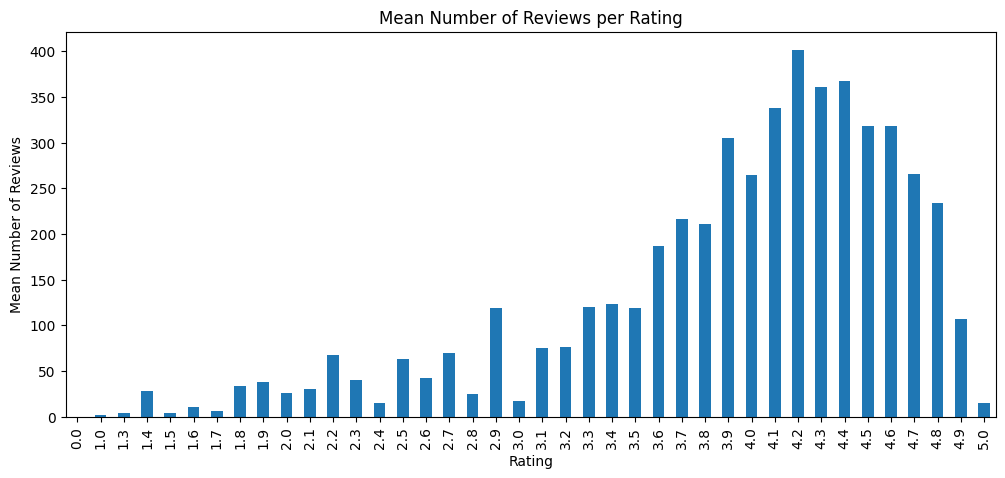

In [51]:
plt.figure(figsize=(12, 5))
mean_reviews.plot(kind='bar')
plt.title('Mean Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Number of Reviews')
plt.xticks(rotation=90)
plt.show()

# Explore Categorical Data

## Distribution of Restaurant Categories

Restaurant Categories: Analyze the distribution of restaurant types (e.g., cuisine, price range).
Cross-tabulations: Perform cross-tabulations between categorical variables (e.g., rating vs. cuisine type).
Reviewer Information: Explore demographics or other available information about reviewers (e.g., location, review count).

### Number of Establishments Per Category

#### 🧑🏻‍🍳🧑🏻‍🍳 There are many minor categories which make it hard to estimate the core categories of restaurants

In [52]:
num_restaurants_by_categories = restaurants['main_category'].value_counts()

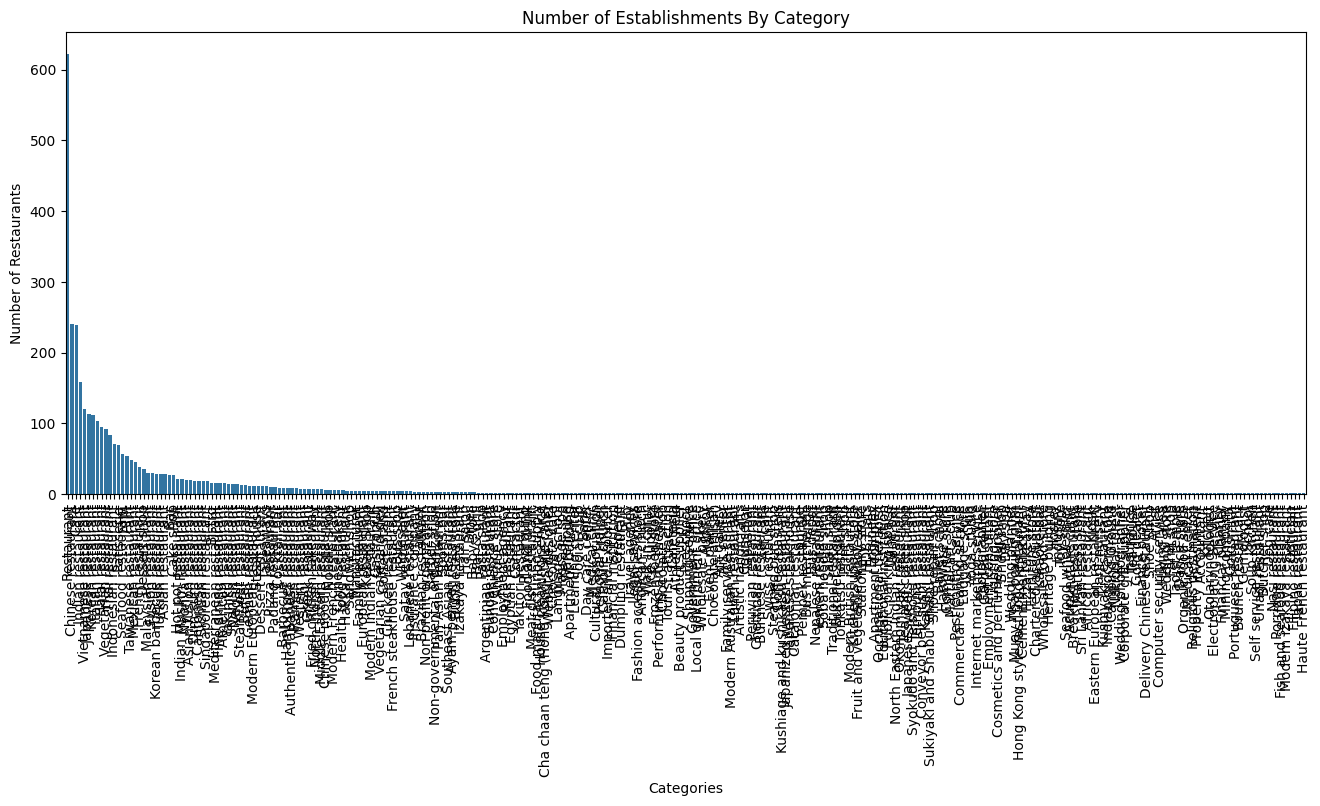

In [53]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

#### 🧑🏻‍🍳🧑🏻‍🍳 We can try just cutting off the minor categories with membership lower than the mean

In [54]:
num_restaurants_by_categories_cut = num_restaurants_by_categories[num_restaurants_by_categories>num_restaurants_by_categories.mean()]
num_restaurants_by_categories_cut

Restaurant                    622
Chinese restaurant            241
Cafe                          239
Indian restaurant             158
Vietnamese restaurant         121
Japanese restaurant           113
Korean restaurant             112
Italian restaurant            104
Halal restaurant               95
Vegetarian restaurant          92
Thai restaurant                84
Indonesian restaurant          71
Patisserie                     69
Seafood restaurant             57
ATM                            54
Taiwanese restaurant           48
Mexican restaurant             45
French restaurant              38
Dessert shop                   35
Malaysian restaurant           30
Fusion restaurant              30
Korean barbecue restaurant     29
Turkish restaurant             29
Asian restaurant               28
Bar                            27
Cake shop                      27
Hot pot restaurant             22
Indian Muslim Restaurant       21
Nyonya restaurant              20
Asian fusion r

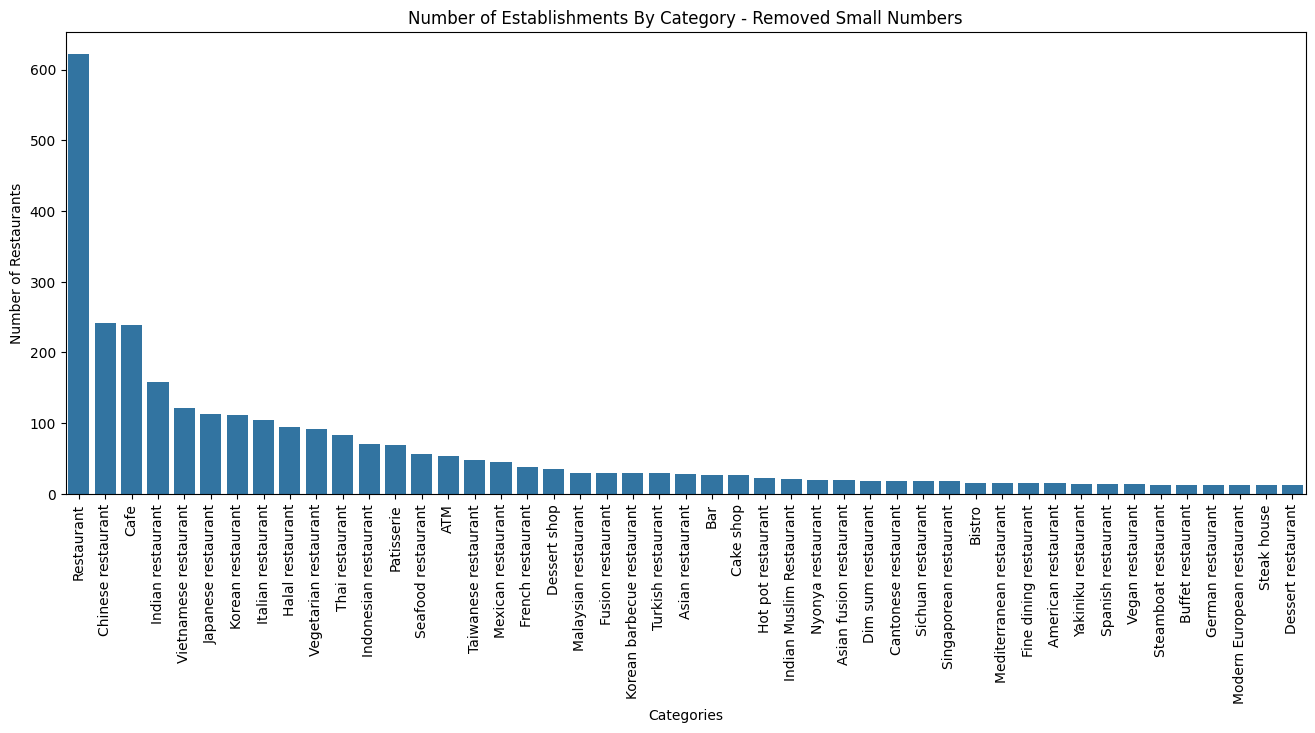

In [55]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories_cut.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category - Removed Small Numbers')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

In [56]:
num_restaurants_by_categories_cut.sum() / num_restaurants_by_categories.sum()

0.8560583941605839

#### 🧑🏻‍🍳🧑🏻‍🍳 But doing this means that we lose about 25% of restaurants. So should we recast the minor categories to major categories? We should analyse what kind of ratings those 25% of restaurants have, if too low then we can drop them? Also, more exact categories should be assigned to restaurants currently categorised as 'restaurants'.

----------------------------------------------------

### Rating & Reviews by Category

In [57]:
restaurants_cut = restaurants[restaurants['main_category'].isin(num_restaurants_by_categories_cut.index)]

In [58]:
mean_ratings_by_category = restaurants_cut.groupby('main_category')['main_rating'].mean().sort_values(ascending=False)
mean_ratings_by_category

main_category
Vegan restaurant              4.557143
Turkish restaurant            4.531034
Steak house                   4.516667
Fine dining restaurant        4.513333
French restaurant             4.486842
Bistro                        4.481250
Mexican restaurant            4.382222
Korean barbecue restaurant    4.358621
Spanish restaurant            4.357143
Italian restaurant            4.347115
Japanese restaurant           4.305310
Vegetarian restaurant         4.277174
Mediterranean restaurant      4.256250
Cantonese restaurant          4.244444
Singaporean restaurant        4.216667
Buffet restaurant             4.215385
Hot pot restaurant            4.213636
Vietnamese restaurant         4.212397
Dessert shop                  4.205714
Bar                           4.181481
American restaurant           4.180000
Sichuan restaurant            4.172222
Indian restaurant             4.160759
Thai restaurant               4.147619
Modern European restaurant    4.141667
Asian fusio

In [59]:
total_reviews_by_category = restaurants_cut.groupby('main_category')['reviews'].sum().sort_values(ascending=False)
total_reviews_by_category

main_category
Restaurant                    268075
Indian restaurant             127349
Cafe                          120443
Chinese restaurant            109517
Italian restaurant             92230
Halal restaurant               63932
French restaurant              62494
Seafood restaurant             56928
Korean restaurant              54995
Vietnamese restaurant          53430
Vegetarian restaurant          50970
Mexican restaurant             45868
Japanese restaurant            41142
Turkish restaurant             40125
Thai restaurant                33228
Indian Muslim Restaurant       32717
Taiwanese restaurant           31164
Korean barbecue restaurant     30115
Hot pot restaurant             27565
Malaysian restaurant           21760
American restaurant            19990
Indonesian restaurant          19443
Dessert shop                   14600
Steak house                    13535
Singaporean restaurant         13498
Buffet restaurant              13322
Cantonese restaurant    

In [60]:
mean_reviews_by_category = restaurants_cut.groupby('main_category')['reviews'].mean().sort_values(ascending=False)
mean_reviews_by_category

main_category
French restaurant             1644.578947
Indian Muslim Restaurant      1557.952381
Turkish restaurant            1383.620690
American restaurant           1332.666667
Hot pot restaurant            1252.954545
Steak house                   1127.916667
Korean barbecue restaurant    1038.448276
Buffet restaurant             1024.769231
Mexican restaurant            1019.288889
Seafood restaurant             998.736842
German restaurant              964.833333
Italian restaurant             886.826923
Indian restaurant              806.006329
Singaporean restaurant         749.888889
Malaysian restaurant           725.333333
Dessert restaurant             714.916667
Cantonese restaurant           687.611111
Halal restaurant               672.968421
Modern European restaurant     670.000000
Spanish restaurant             650.214286
Taiwanese restaurant           649.250000
Vegan restaurant               626.714286
Steamboat restaurant           562.230769
Vegetarian restauran

#### 🧑🏻‍🍳🧑🏻‍🍳 Cuisines like Turkish, Italian, Mexican, Vietnamese, Korean BBQ have the highest mean ratings, though they may not have the most reviews

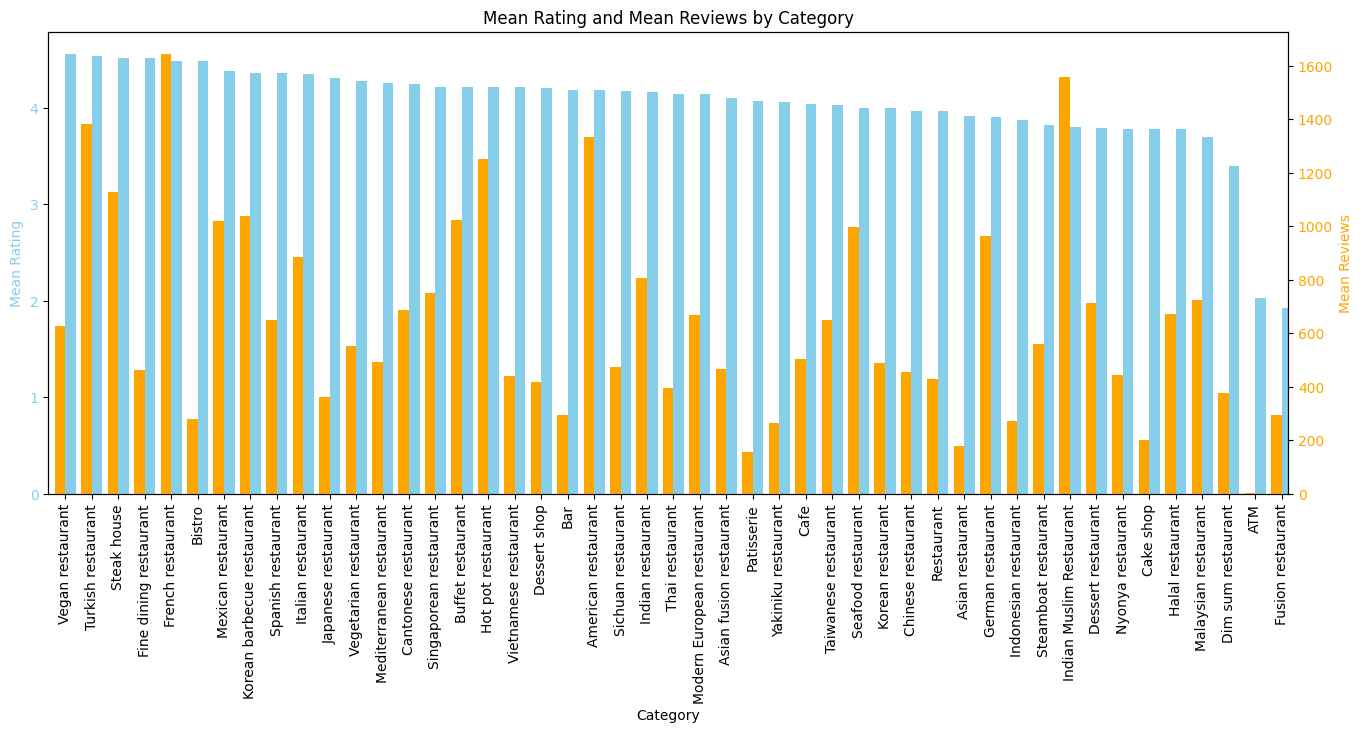

In [63]:
fig, ax1 = plt.subplots(figsize=(16, 6))
mean_ratings_by_category.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Rating', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Mean Rating and Mean Reviews by Category')
ax1.set_xticklabels(mean_ratings_by_category.index, rotation=90)

ax2 = ax1.twinx()
mean_reviews_by_category.reindex(mean_ratings_by_category.index).plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)
ax2.set_ylabel('Mean Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()

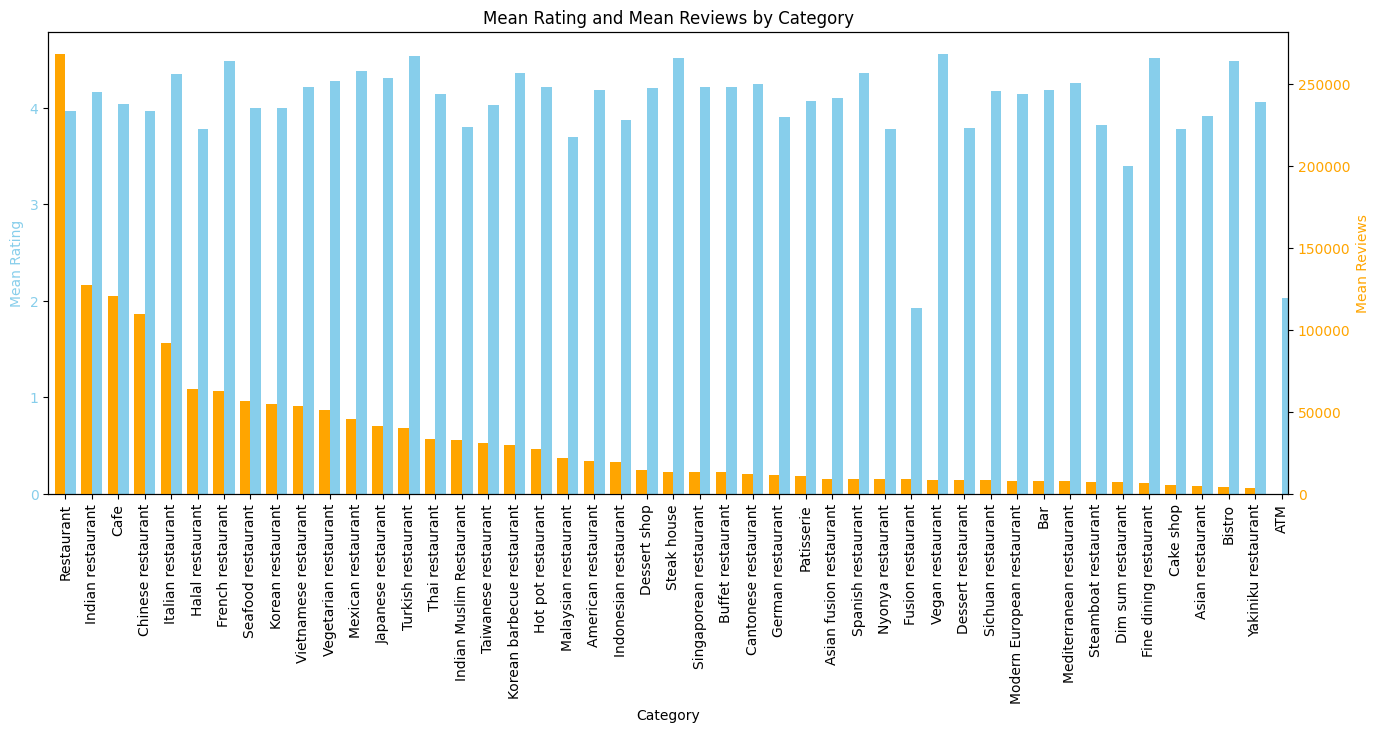

In [64]:
sorted_index = total_reviews_by_category.sort_values(ascending=False).index
mean_ratings_sorted = mean_ratings_by_category.reindex(sorted_index)
mean_reviews_sorted = mean_reviews_by_category.reindex(sorted_index)

fig, ax1 = plt.subplots(figsize=(16, 6))
mean_ratings_sorted.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Rating', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Mean Rating and Mean Reviews by Category')
ax1.set_xticklabels(mean_ratings_sorted.index, rotation=90)

ax2 = ax1.twinx()
total_reviews_sorted.plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)
ax2.set_ylabel('Mean Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()